In [2]:
import pandas as pd

df = pd.read_csv('data.csv')

df.head()

# Convert create_on to Date
import calendar

df['created_on'] = pd.to_datetime(df['created_on'])

del df['description']

del df['title']
del df['price_period']
del df['l6']
del df['l5']
del df['id']
# df = df[df['l2'] == 'Capital Federal']
print("initial len df",len(df))
df = df.loc[df['l2'] == 'Capital Federal']
print("len of caba", len(df))
df = df.loc[df['operation_type'] == 'Venta']
df = df.loc[df['property_type'] == 'Departamento']
print("len of caba venta dto", len(df))


print(df['surface_total'].mean())
print(df['surface_covered'].mean())


# fill surface_total
df['surface_total'].fillna((df['surface_total'].mean()), inplace=True)
# fill surface_covered
df['surface_covered'].fillna((df['surface_covered'].mean()), inplace=True)

# clean bedrooms
df_one_bedroom = df.loc[df['bedrooms'] == 1.0]


#df_caba_venta.to_csv('cleaned_data.csv', index=False)
df.head()

initial len df 1000000
len of caba 255028
len of caba venta dto 126268
105.62022282754832
85.3710296077409


,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
43,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.643163,-58.494823,Argentina,Capital Federal,Villa Luro,NaN,2.0,NaN,1.0,105.620223,85.37103,100000.0,USD,Departamento,Venta
68,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.579185,-58.434970,Argentina,Capital Federal,Palermo,Palermo Hollywood,NaN,NaN,1.0,33.000000,29.00000,105000.0,USD,Departamento,Venta
69,Propiedad,2020-12-26,2021-02-11,2020-12-26,-34.556279,-58.462507,Argentina,Capital Federal,Belgrano,NaN,1.0,NaN,1.0,40.000000,85.37103,110000.0,USD,Departamento,Venta
72,Propiedad,2020-12-26,2020-12-29,2020-12-26,-34.592565,-58.445352,Argentina,Capital Federal,Villa Crespo,NaN,1.0,NaN,1.0,27.000000,25.00000,84900.0,USD,Departamento,Venta
75,Propiedad,2020-12-26,2021-04-10,2020-12-26,-34.606791,-58.469843,Argentina,Capital Federal,Villa General Mitre,NaN,NaN,NaN,1.0,27.000000,24.00000,68000.0,USD,Departamento,Venta


In [3]:
df['bedrooms'].unique()

array([ nan,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,  32.,   8.,
        77.,   9.,  36.,  70.,  10., 153.,  22.,  12.,  11.,  21.,  20.,
        -1.,  13.,  14.,  16.])

In [4]:
df['bedrooms'].isnull().values.ravel().sum()

21716

In [5]:
df_zero_bedroom = df.loc[df['bedrooms'] == 0.0]
df_zero_bedroom['surface_covered'].mean()


85.37102960774088

In [6]:
df_one_bedroom = df.loc[df['bedrooms'] == 1.0]
df_one_bedroom['surface_covered'].mean()



62.80081627426867

In [7]:
df_two_bedroom = df.loc[df['bedrooms'] == 2.0]
df_two_bedroom['surface_covered'].mean()

91.35325069851427

In [9]:
df['bedrooms'].mean()
df['surface_covered'].mean()
    

85.37102960774088

In [14]:
df['bedrooms'].fillna((df['bedrooms'].mean()), inplace=True)
df['rooms'].fillna((df['rooms'].mean()), inplace=True)

In [15]:
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
43,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.643163,-58.494823,Argentina,Capital Federal,Villa Luro,NaN,2.00000,1.82733,1.0,105.620223,85.37103,100000.0,USD,Departamento,Venta
68,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.579185,-58.434970,Argentina,Capital Federal,Palermo,Palermo Hollywood,1.82733,1.82733,1.0,33.000000,29.00000,105000.0,USD,Departamento,Venta
69,Propiedad,2020-12-26,2021-02-11,2020-12-26,-34.556279,-58.462507,Argentina,Capital Federal,Belgrano,NaN,1.00000,1.82733,1.0,40.000000,85.37103,110000.0,USD,Departamento,Venta
72,Propiedad,2020-12-26,2020-12-29,2020-12-26,-34.592565,-58.445352,Argentina,Capital Federal,Villa Crespo,NaN,1.00000,1.82733,1.0,27.000000,25.00000,84900.0,USD,Departamento,Venta
75,Propiedad,2020-12-26,2021-04-10,2020-12-26,-34.606791,-58.469843,Argentina,Capital Federal,Villa General Mitre,NaN,1.82733,1.82733,1.0,27.000000,24.00000,68000.0,USD,Departamento,Venta


bathrooms
1.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
2.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
3.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
4.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
5.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
6.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
7.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
8.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
9.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
10.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
11.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

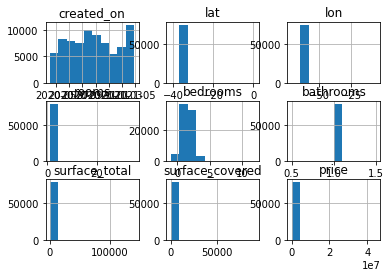

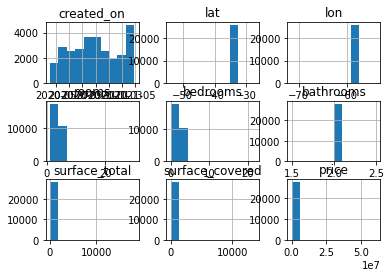

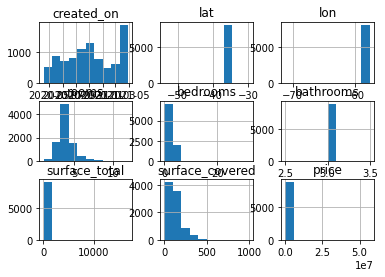

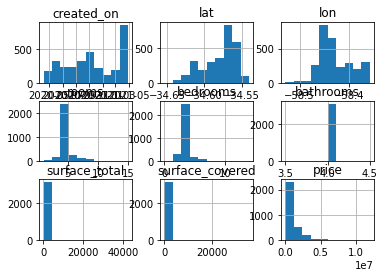

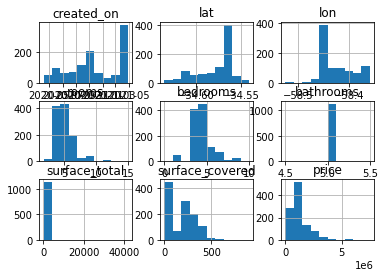

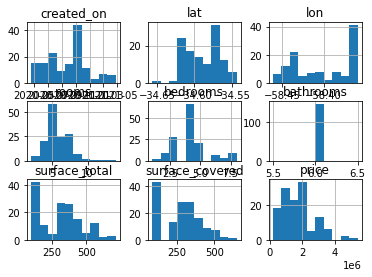

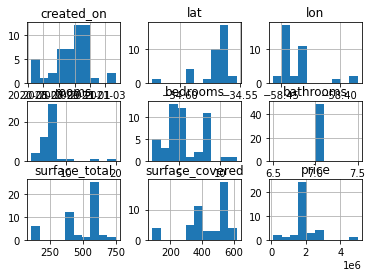

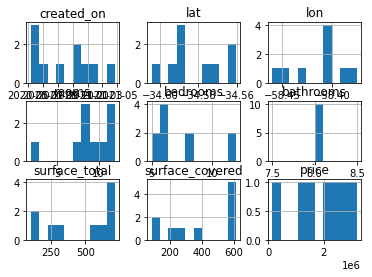

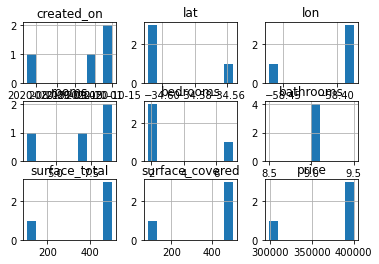

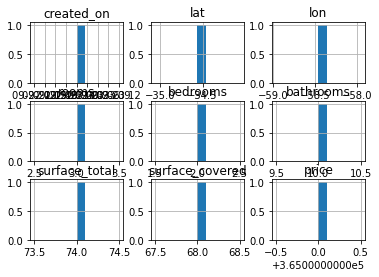

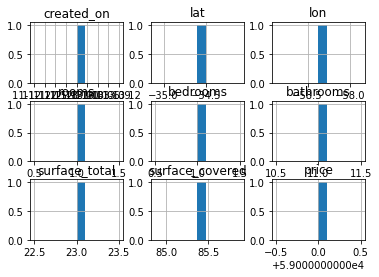

In [19]:
df.groupby('bathrooms').hist()

In [21]:
df_price_surface_covered = df[['price','surface_covered']]

In [22]:
df_price_surface_covered.head()

,price,surface_covered
43,100000.0,85.37103
68,105000.0,29.00000
69,110000.0,85.37103
72,84900.0,25.00000
75,68000.0,24.00000


In [34]:
df['price'].describe()


count    1.241110e+05
mean     2.603566e+05
std      8.081952e+05
min      0.000000e+00
25%      9.990000e+04
50%      1.490000e+05
75%      2.490000e+05
max      1.110000e+08
Name: price, dtype: float64

In [47]:
def divide_by_one_thounsans(x):
    return x / 1000


df['clustered_price'] = df['price'].apply(divide_by_one_thounsans)

In [48]:
df['clustered_price'].describe()

count    124111.000000
mean        260.356648
std         808.195194
min           0.000000
25%          99.900000
50%         149.000000
75%         249.000000
max      111000.000000
Name: clustered_price, dtype: float64

<AxesSubplot:>

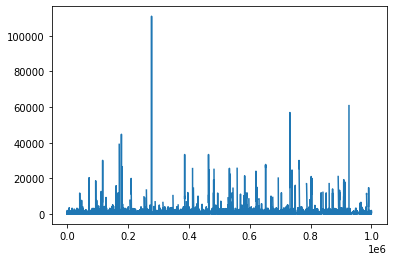

In [49]:
df['clustered_price'].plot()

In [53]:
df['clustered_price'] = df['clustered_price'].loc[df['clustered_price'] < 5000]
df['clustered_price'].describe()

count    123883.000000
mean        234.289476
std         293.578954
min           0.000000
25%          99.900000
50%         149.000000
75%         249.000000
max        4949.059000
Name: clustered_price, dtype: float64

<AxesSubplot:>

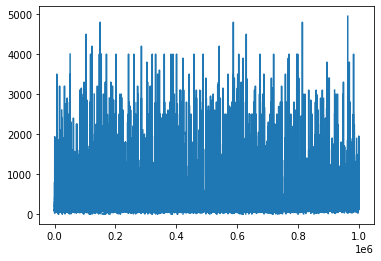

In [54]:
df['clustered_price'].plot()